In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [2]:
image= imread("/content/drive/MyDrive/1.jpg") 
print(image.shape)

(960, 722, 3)


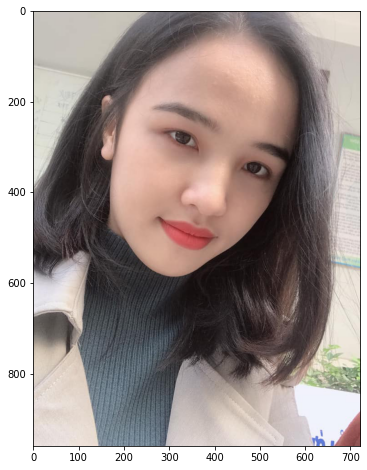

In [3]:
plt.figure(figsize=[12,8])
plt.imshow(image)

In [4]:
image_raw = image.sum(axis=2) ##chuyển sang ảnh xám
print(image_raw)

[[584 584 584 ... 666 663 663]
 [584 584 584 ... 666 663 663]
 [584 584 584 ... 666 663 663]
 ...
 [677 680 683 ... 317 295 295]
 [680 683 686 ... 314 307 307]
 [683 686 689 ... 308 319 319]]


In [5]:
image_raw.max() ## giá trị lớn nhất của mảng
print(image_raw.max())

764


In [7]:
image_bw = image_raw/image_raw.max() #thay vì dùng giá trị ta sẽ dùng % để dễ dàng nhìn độ ảnh hưởng của vector tới dữ liệu
print(image_bw)

[[0.76439791 0.76439791 0.76439791 ... 0.87172775 0.86780105 0.86780105]
 [0.76439791 0.76439791 0.76439791 ... 0.87172775 0.86780105 0.86780105]
 [0.76439791 0.76439791 0.76439791 ... 0.87172775 0.86780105 0.86780105]
 ...
 [0.88612565 0.89005236 0.89397906 ... 0.41492147 0.38612565 0.38612565]
 [0.89005236 0.89397906 0.89790576 ... 0.41099476 0.40183246 0.40183246]
 [0.89397906 0.89790576 0.90183246 ... 0.40314136 0.41753927 0.41753927]]


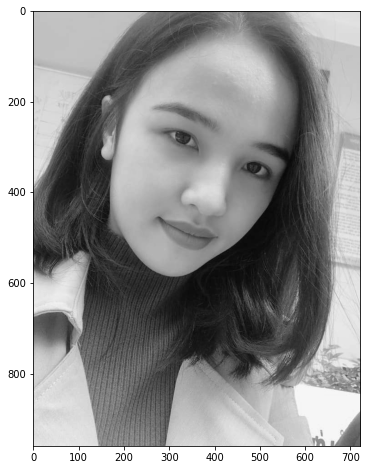

In [8]:
plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

In [9]:
# dùng sklearn.decomposition để tính PCA
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)
# lấy phương sai tích lũy
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

Number of components explaining 95% variance: 12


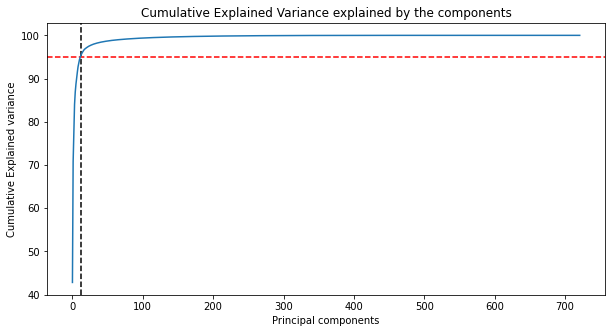

In [ ]:
# số thành phần chính có phương sai trên 95%
k = np.argmax(var_cumu>95)
print("Số thành phần giải thích phương sai 95%: "+ str(k))

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

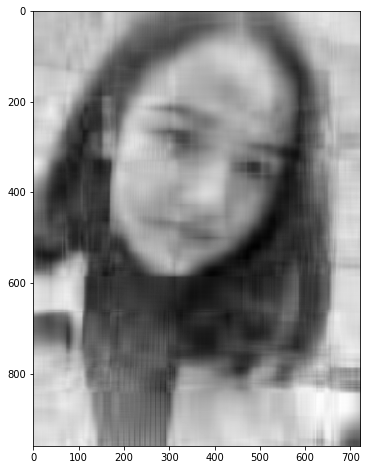

In [ ]:
#từ đồ thị trên ta thấy chỉ cần 12 vector đã có thể tái tạo lại đến 95% dữ liệu ban đầu
ipca = IncrementalPCA(n_components=k) #từ k vector ta sẽ tái tạo lại dữ liệu ban đầu
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

#hình ảnh được dựng lại từ k vecto
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

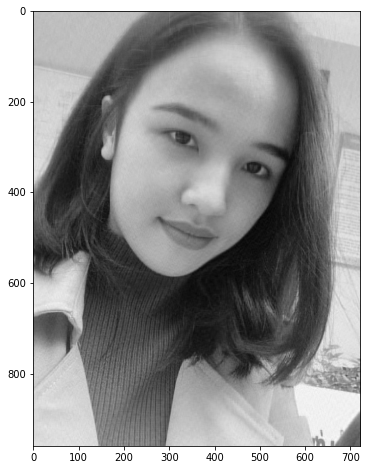

In [ ]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    


plt.figure(figsize=[12,8])
plot_at_k(100) #từ 100 vector ban đầu tái tạo lại dữ liệu

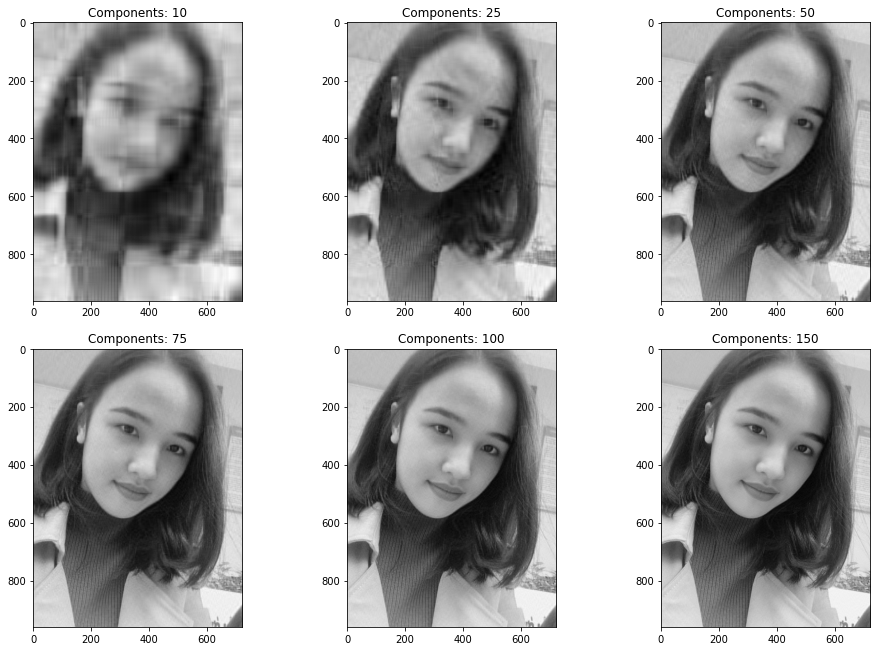

In [ ]:
#dữ liệu được tái tạo qua các lần tăng k vector
ks = [10, 25, 50, 75, 100, 150]

plt.figure(figsize=[15,12])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.5, hspace=0.0)
plt.show()